# Model Fitness: Customer Evaluation Project

Valeriya Vazhnova

## Introduction

The main goal of this project is to help Model Fitness gym chain evaluate its customers' profiles. After assessing all the information on their behaviour, we are planning to learn:

- if there are any specific groups of customers with distinct behavioral patterns;
- if the future churn rate can be predicted for these groups.

In order to achieve this, we're planning to use several different prediction algorythms, including logisitc regression and random forest (for predicting the churn rate) and KMeans (for clustering).

## <a id='cont'>Table of Contents</a>

[Importing the Libraries](#libraries)

**Step 1.** [Downdoading the Data](#step1)

[*Conclusions to Step 1*](#step1concl)

**Step 2.** [Exploratory Data Analysis](#step2)

[*Conclusions to Step 2*](#step2concl)

**Step 3.** [Building a Model to Predict User Churn](#step3)

[*Conclusions to Step 3*](#step3concl)

**Step 4.** [Creating User Clusters](#step4)

[*Conclusions to Step 4*](#step4concl)

[**General Conclusions**](#genconcl)

## <a id='libraries'>Imporing the Libraries</a>

We'll start by importing the libraries we're planning to use in our work.

In [1]:
# For working with rectangular data

import pandas as pd

# For plotting graphs
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# For scaling and splitting the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For training prediction models and assessing their results
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [2]:
# in order to avoid the warnings
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

[Back to Contents](#cont)

### <a id='step1'>Step 1. Downloading the Data</a>

In [3]:
try:
    data = pd.read_csv('/Users/lera/Documents/Personal/_Yandex practicum/4_studies/sprint 12_forecasts and prediction/project/gym_churn_us.csv')
except:
    data = pd.read_csv('/datasets/gym_churn_us.csv')


In [4]:
display(data.head())
display(data.info(memory_usage='deep'))


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

In [5]:
data.columns = data.columns.str.lower()

### <a id='step1concl'>Conclusions to Step 1</a>

What we have here is a table with 4000 entries. From the first glance it seems that it doesn't have any missing values. In general, all the data seems to be of the right type. We've transformed column names to lowercase in order to unify them. Our next step is to run exploratory data analysis and check the quality of our data.

[Back to Contents](#cont)

## <a id='step2'>Step 2. Exploratory Data Analysis</a>
Here we're going to have a close look at the dataset in order to see:

- how our data is distributed;

- if there is any significant difference in behavior between the clients who's already left and the clients who stayed;

- if there is any correlation between different features of the data.

#### Overall checkup

In [6]:
# Checking data for missing values

data.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [7]:
# Checking data for duplicates

data.duplicated().sum()

0

We've already seen from the info( ) method that our dataset has no missing values. Now we've proven it once more. When studying mean and standard deviation, it's easier to compare similar values, which is why we're going to do it separately for categorical and numerical features.

In [8]:
categorical = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']
numerical = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

In [9]:
data[categorical].describe()

,gender,near_location,partner,promo_friends,phone,group_visits,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,0.412250,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,0.492301,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This description gives us some initial information about the Model Fitness clientelle:

- Gender is divided more or less equally (we can only guess which value stands for which gender).

- Most customers leave near the gym.

- Most customers are neither part of a partner program, nor signed up through 'bring a friend' offer.

- 25% customers didn't leave their phone number.

- Almost half of the customers don't participate in group classes.

- Churn rate among all the dataset is around 25%.

In [10]:
data[numerical].describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


Continuing with our observations:

- Short contracts (1 month) are pretty popular: more than half of the clients prefer them.

- Most clients are young people: age varies between 18 and 41 with the mean of 29.

- While average lifetime is around 4 months, for 25% of the clients it is 1 month. It means, we have a significant share of new clients.

- Average class frequency is about 2 classes per week. It doesn't change much over time (average frequency over the lifetime and over the previous month seems very similar).

#### Mean feature values in two groups (who left and who stayed)

In [11]:
data_gr = data.groupby('churn').mean()
data_gr

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


What can we assume from this inspection? Clients who tend to stay:

- More oftern live nearby than not.
- More often participate in a partnership program.
- Have longer contracts (mean value is almost 6 month).
- Spend 1,5 times more money on additional services
- Stay with the gym for several months (mean value for lifetime is 4.7).
- Visit around 2 classes per week.

Clients who left:
- Had shorter contracts (mean value is 1.7).
- Visited group lessons twice less often.
- Were on average a little younger (26.9 vs 29.9 years old).
- Spent less money on additional services.
- Mostly left after a month (their average lifetime is 0.99).

However, we must underline that these are the first very rough guesses based only on grouping our data.

#### Bar histograms and feature distributions for two groups of users (who left and who stayed)

In [12]:
# Splitting the dataset in two groups

stayed = data[data.churn == 0]
left = data[data.churn == 1]

In [13]:
# Preparing data for barplots

stayed_categorical = pd.DataFrame(index=stayed[categorical].columns)
stayed_categorical['0'] = len(stayed) - stayed[categorical].sum().astype(int)
stayed_categorical['1'] = stayed[categorical].sum().astype(int)
stayed_categorical = stayed_categorical.T.drop(columns='churn')
stayed_categorical

,gender,near_location,partner,promo_friends,phone,group_visits
0,1440,373,1369,1900,283,1575
1,1499,2566,1570,1039,2656,1364


In [14]:
left_categorical = pd.DataFrame(index=left[categorical].columns)
left_categorical['0'] = len(left) - left[categorical].sum().astype(int)
left_categorical['1'] = left[categorical].sum().astype(int)
left_categorical = left_categorical.T.drop(columns='churn')
left_categorical

,gender,near_location,partner,promo_friends,phone,group_visits
0,519,246,684,866,103,776
1,542,815,377,195,958,285


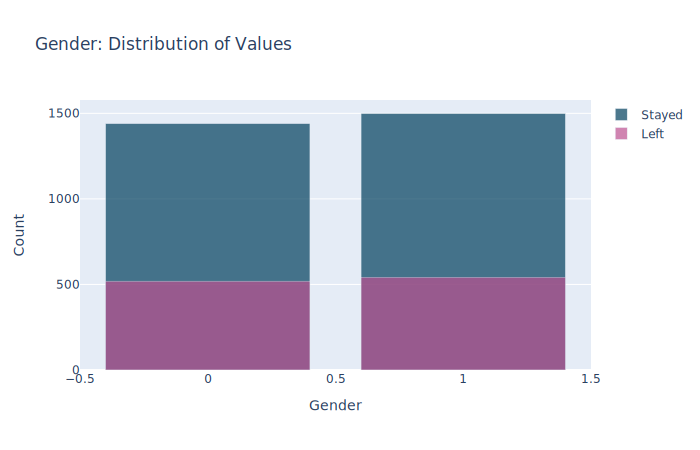

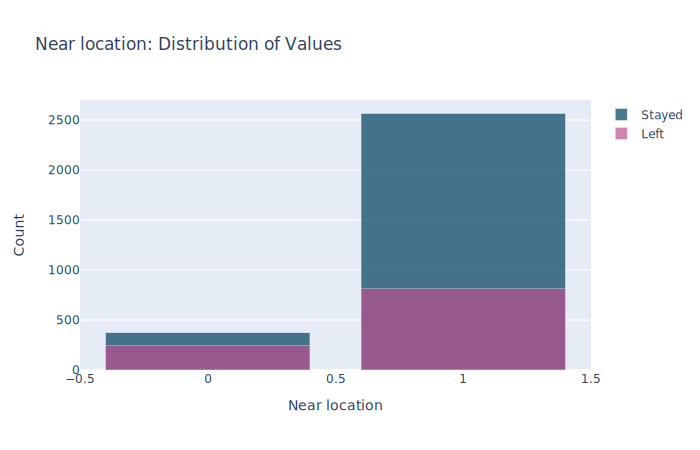

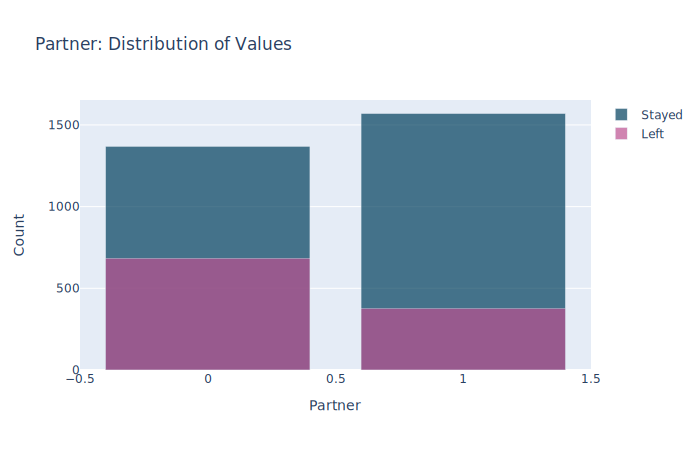

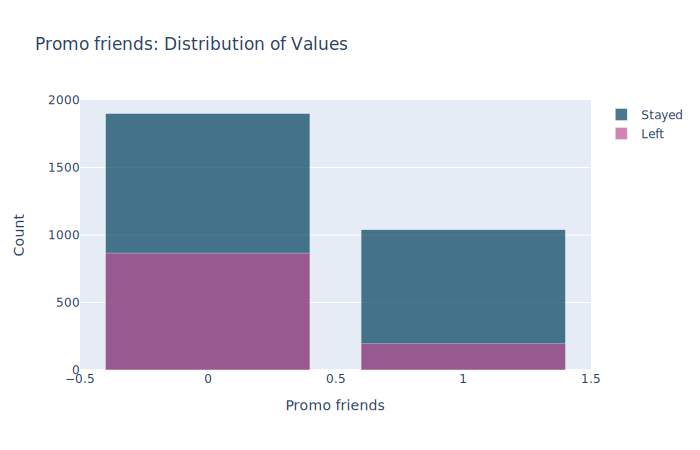

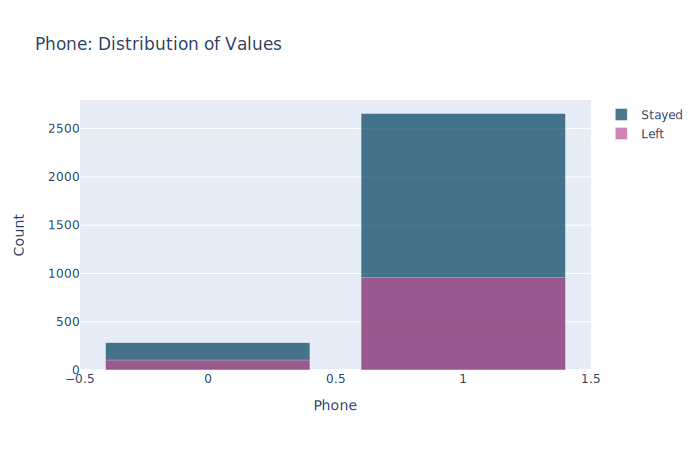

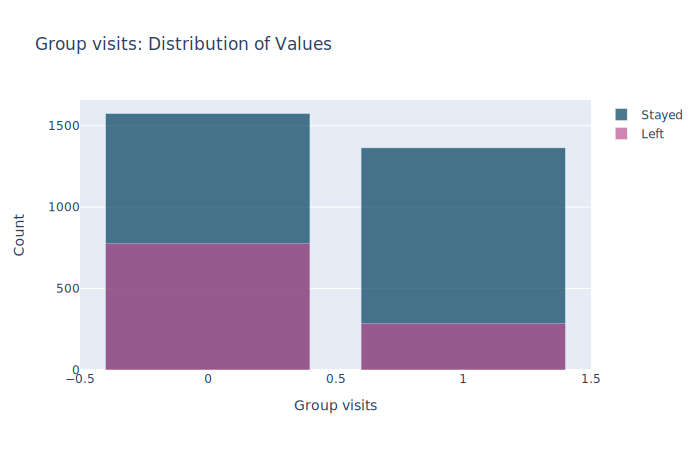

In [15]:
# Bar plots for categorical features

for i in left_categorical.columns:
    fig = go.Figure(data=[
        go.Bar(name='Stayed', y=stayed_categorical[i], marker_color='#003f5c', opacity=0.7),
        go.Bar(name='Left', y=left_categorical[i], marker_color='#bc5090', opacity=0.7)
    ])
    fig.update_layout(barmode='overlay', title='{}: Distribution of Values'.format(i.replace('_',' ').capitalize()),
                     xaxis_title=i.replace('_',' ').capitalize(),
                     yaxis_title='Count')
    fig.show('svg')

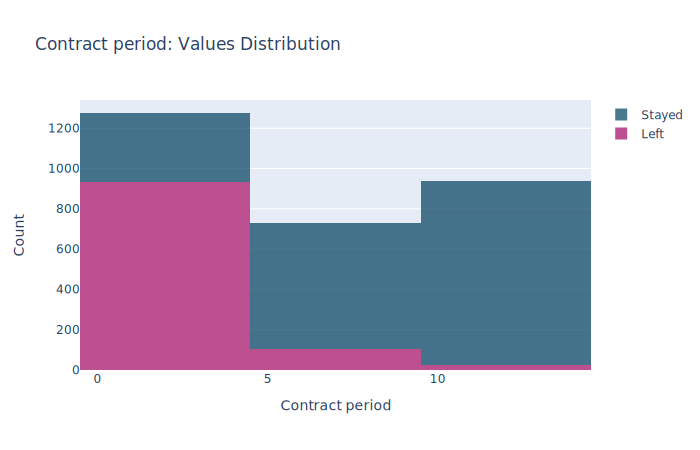

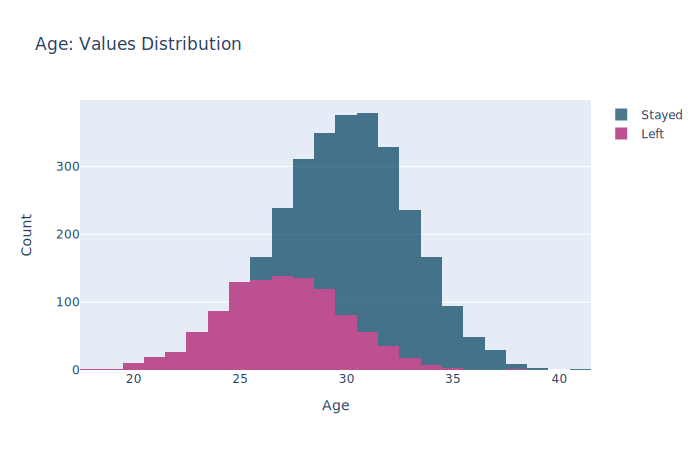

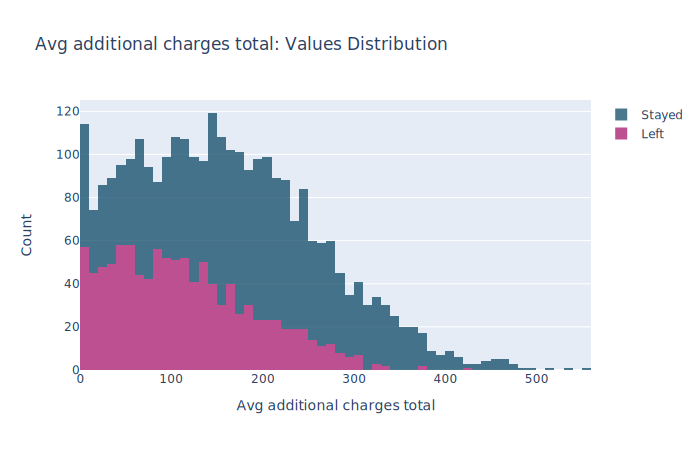

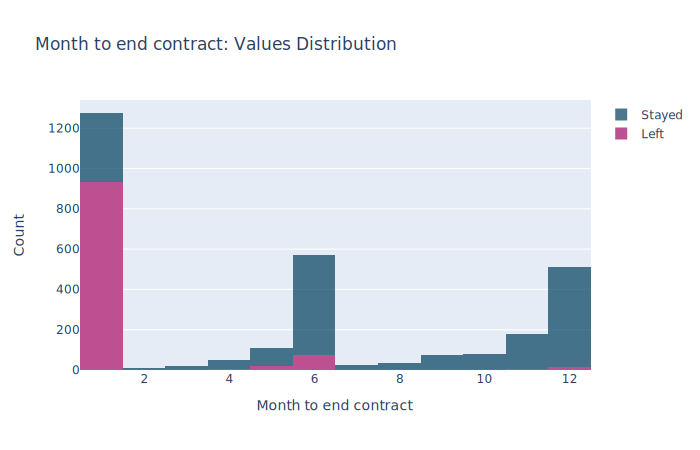

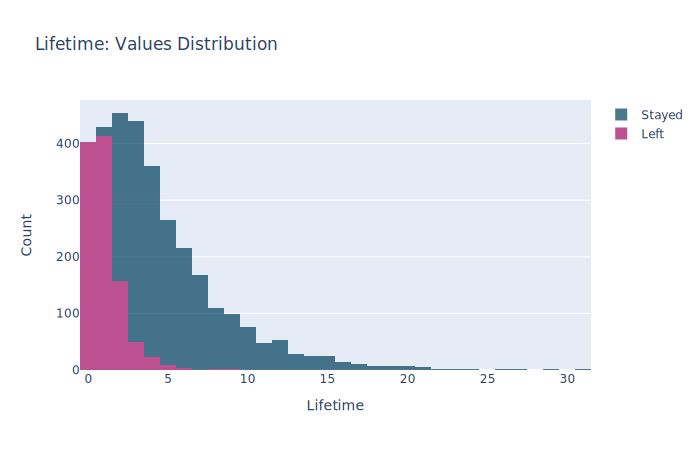

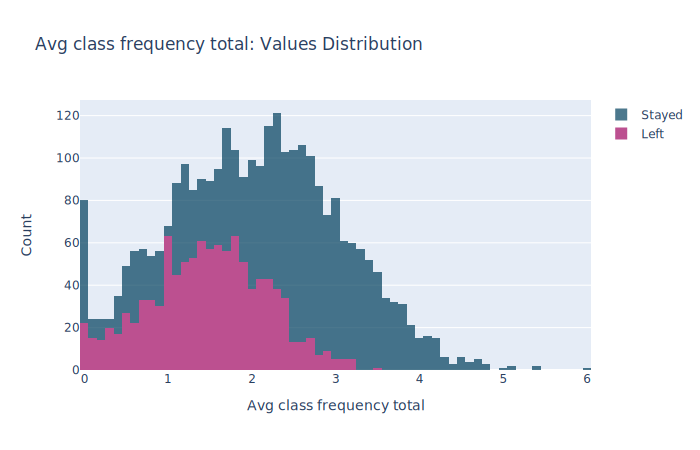

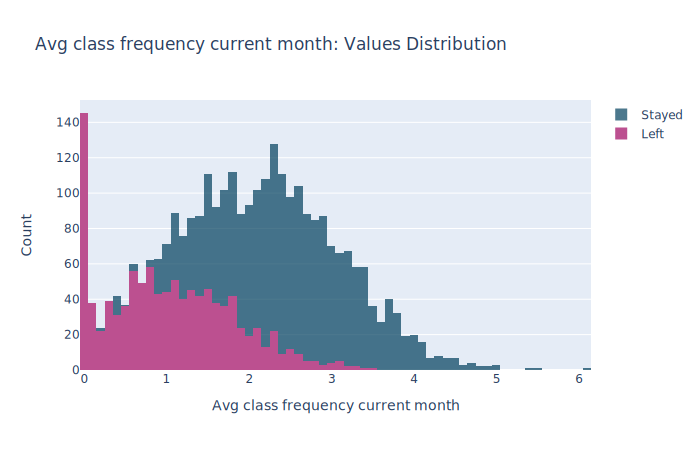

In [16]:
# Histograms for numerical features

for i in numerical:
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=stayed[i], marker_color='#003f5c', opacity=0.7, name='Stayed'))
    fig.add_trace(go.Histogram(x=left[i], marker_color='#bc5090', opacity=1, name='Left'))
    fig.update_layout(barmode='overlay',
                      title_text='{}: Values Distribution'.format(i.replace('_',' ').capitalize()),
                     xaxis_title=i.replace('_',' ').capitalize(),
                     yaxis_title='Count')
    fig.show('svg')

Even though we see outliers in some parameters, we'd prefer to keep them in the dataset for several reasons. First, the dataset is comparatively small, and we wouldn't want to lose a big part of it. Second, these outliers are located not that far from the mean to make a real difference. And third, we know that they represent real data. All this considered, we've decided there is no need to trim the dataset and get rid of the outleirs.

**Age** is close to normal distribution both among clients who left and who stayed.

**Average additional charges** distribution is skewed to the right, also there is a visible peak at 0: there is a big number of people who prefer not to spend extra money.

**Lifetime** is also skewed right, and that's where the difference between current clients and those who left becomes especially visible. People who left were clients of Model Fitness for less then 5 months (usually 1-2 months). 

**Average class frequency** distribution is almost the same for current month and total period.  Interesting observation: there is a peak around 0 on the graph for current month for people who left. Does it mean that they tend not to visit group classes when the decision to leave is already made? Or is it basically a faulty feature: they've already left but they were assigned 0 since they still remain in the dataset?

#### Correlation matrix

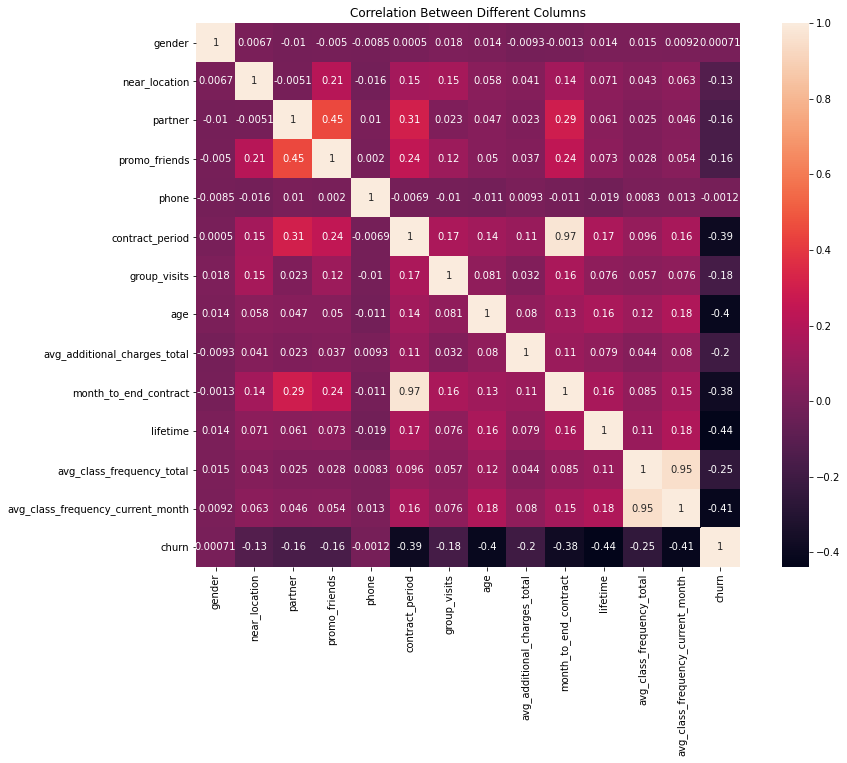

In [17]:
plt.figure(figsize=(15,10))
plt.title('Correlation Between Different Columns')
sns.heatmap(data.corr(), annot=True, square=True);

This heatmap shows us that our dataset has several features with **strong positive correlation**:

- average class frequency total and over current month (correlation coefficient 0.95);

- contract period and month until the end of the contract (correlation coefficient 0.97).

We can assume that these features are interdependent.

There exists also **noticeable positive correlation** between:

- partnership program and 'bring a friend' offer (0.45);

*The question is, can one client do both at the same time?*

- partnership program and contract period (0.31) or months until the end of the contract (0.29);

- 'bring a friend' offer and contract period (0.24).

Noticeable **negative correlation** exists between:

- churn and average class frequency over the current month (-0.41);
- churn and lifetime (0.44);
- churn and contract period (0.39) and time until the end of the contract (0.38).

It means, the smaller these parameters are, the higher is the chance of churn (1).

[Back to Contents](#cont)

### <a id='step2concl'>Conclusions to Step 2</a>

In this part of our project, we've performed exploratory data analysis, learned about the distribution of the features and correlations that exist in the dataset.

We've decided not to trim the outliers because they represent real data and also are not that far from the mean values. However, we will consider dropping the column avg_class_frequency_current_month for two reasons:

1. We believe it may contain misleading information on the clients who left.

2. Its correlation with the column avg_class_frequency_total is too strong which can mislead the prediction model.

[Back to Contents](#cont)

## <a id='step3'>Step 3. Building a Model to Predict User Churn</a>

Now we're going to build a binary classification model with the target feature being the user's leaving next month (churn). We'll try two algorythms (logistic regression and random forest) and see which gives us better results.

In order to avoid overfitting and simplify the prediction model, we'll drop two columns:

- avg_class_frequency_current_month;

- month_to_end_contract.


In [18]:
data_cut = data.drop(['avg_class_frequency_current_month', 'month_to_end_contract'], axis=1)

In [19]:
data_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        4000 non-null   int64  
 1   near_location                 4000 non-null   int64  
 2   partner                       4000 non-null   int64  
 3   promo_friends                 4000 non-null   int64  
 4   phone                         4000 non-null   int64  
 5   contract_period               4000 non-null   int64  
 6   group_visits                  4000 non-null   int64  
 7   age                           4000 non-null   int64  
 8   avg_additional_charges_total  4000 non-null   float64
 9   lifetime                      4000 non-null   int64  
 10  avg_class_frequency_total     4000 non-null   float64
 11  churn                         4000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 375.1 KB


#### Train and validation sets

In [20]:
# Defining the features and the tagret value

X = data_cut.drop(columns='churn')
y = data_cut.churn

In [21]:
# Splitting the data to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# Standardization of the data

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

#### Training two prediction models (Logistic Regression and Random Forest) and evaluating them

In [23]:
# Training and accessing the models

models = [LogisticRegression, RandomForestClassifier]

for i in models:
    model = i(random_state=0)
    model.fit(X_train_st, y_train)
    prediction = model.predict(X_test_st)
    probability = model.predict_proba(X_test_st)[:,1]
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, probability)
    print('Model: {:}'.format(i))
    print('Accuracy score: {:.2f}'.format(accuracy))
    print('Precision score: {:.2f}'.format(precision))
    print('Recall score: {:.2f}'.format(recall))
    print('F1 score: {:.2f}'.format(f1))
    print('ROC AUC score: {:.2f}'.format(roc_auc))
    print('')

Model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy score: 0.90
Precision score: 0.79
Recall score: 0.81
F1 score: 0.80
ROC AUC score: 0.95

Model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy score: 0.89
Precision score: 0.79
Recall score: 0.76
F1 score: 0.77
ROC AUC score: 0.94



Even though we were asked to use only three metrics (accuracy, precision and recall), we've also calculated F1 score and ROC_AUC (Receiver Operating Characteristics and Area Under the Curve) metrics.

On one hand, we know that **accuracy** works well only with balanced datasets (where objects are distributed evenly between classes), and that's not our case, so we're not going to rely solemnly on this score.

On the other hand, **precision** and **recall** to some extent balance each other out: adjusting the model parameters to get a better score on one of the metrics might lead to drop of another one.

Because of this, we will be paying more attention to **F1 score** which describes the balance between precision and recall. 

We've also used **ROC_AUC score** (Receiver Operating Characteristics and Area Under the Curve) to evaluate the probabilities our model calculated.

After checking all these metrics, we can assume that in our particular case predictions made by **logistic regression** were more precise, so we'll use this model.


In [24]:
# Standardizing the whole dataset

X_st = scaler.fit_transform(X)

# Caclucating the probabilities for the whole dataset

model = LogisticRegression(random_state=0)
model.fit(X_train_st, y_train)
predict = model.predict(X_st)
probability = model.predict_proba(X_st)[:,1]

In [25]:
# Adding probabilities to our dataset

data_cut['churn_probability'] = probability.round(2)
data_cut.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,churn_probability
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0,0.19
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0,0.00
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0,0.51
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0,0.00
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0,0.37


After calculating probability of leaving the gym for each customer and adding this parameter to our dataset we can study and visualize it.

In [26]:
data_cut.churn_probability.describe()

count    4000.000000
mean        0.268800
std         0.351875
min         0.000000
25%         0.000000
50%         0.040000
75%         0.550000
max         1.000000
Name: churn_probability, dtype: float64

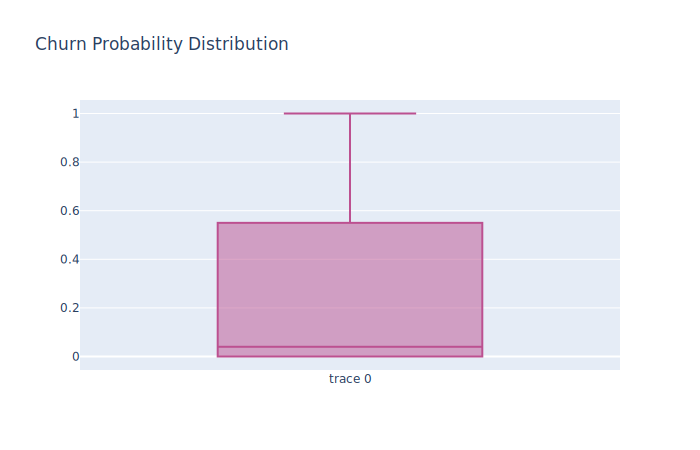

In [27]:
fig = go.Figure()
fig.add_trace(go.Box(y=data_cut.churn_probability, marker_color='#bc5090'))
fig.update_layout(title_text='Churn Probability Distribution')
fig.show('svg')

According to this boxplot, the perspectives are rather optimistic. The median churn probability is really low (0.04), and for 75% of the dataset it's less than 0.55.

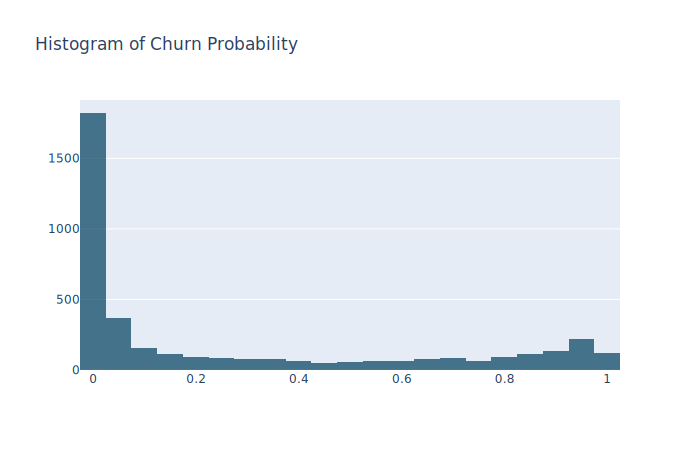

In [28]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data_cut.churn_probability, marker_color='#003f5c', opacity=0.7))
fig.update_layout(title_text='Histogram of Churn Probability')
fig.show('svg')

In [29]:
data_cut.churn.corr(data_cut.churn_probability)

0.7993963547774671

We've also checked if the actual churn we know about correlates with our predictions and learned that the correlation between these values is positive and very high (0.79), which is great news: seems like our model is working. 

### <a id='step3concl'>Conclusions to Step 3</a>

In this section, we've singled out the prediction model which gives us the most accurate results on the given dataset, logistic regression. Afterwards we've applied this model to our data and calculated churn probability rate for each customer.

[Back to Contents](#cont)

## <a id='step4'>Step 4. Creating User Clusters</a>

Here we're going to try to split our users in several groups based on their behavior and predict the probability of churn for each group.

In [30]:
users = data_cut.drop(columns='churn')

In [31]:
# Standardizing the data

users_st = scaler.fit_transform(users)

#### Building a matrix of distances and plotting a dendrogram

In [32]:
users_linked = linkage(users_st, method='ward')

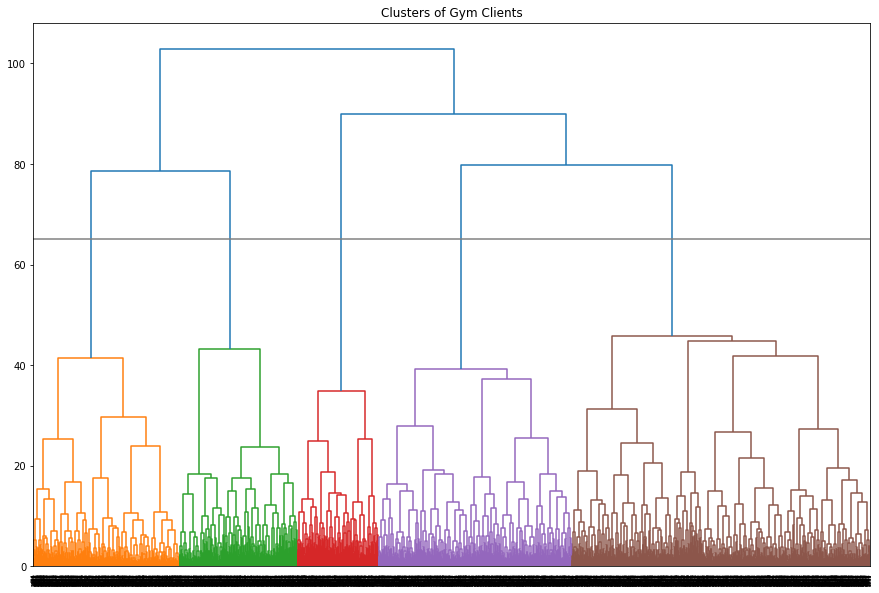

In [33]:
plt.figure(figsize=(15,10))
dendrogram(users_linked, orientation='top')
plt.title('Clusters of Gym Clients')
plt.axhline(65, color='grey')
plt.show()

The shape of this dendrgogram suggests, we should divide our users into five separate clusters.

In [34]:
# Training the clustering model with the KMeans algorithm and predicting customer clusters

km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(users_st)

In [35]:
users['cluster'] = labels

#### Checking mean feature values for clusters

In [36]:
clusters = users.groupby('cluster').mean()
clusters

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn_probability
cluster,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.276295
1,0.501185,1.000000,0.325829,0.210900,1.0,1.720379,0.277251,26.823460,109.435333,1.045024,1.431561,0.741955
2,0.525997,0.998267,0.181976,0.058925,1.0,4.029463,0.476603,30.442808,170.711076,5.169844,2.142433,0.062565
3,0.500000,0.990584,0.951977,0.781544,1.0,8.615819,0.537665,29.914313,156.808129,4.603578,2.021304,0.039134
4,0.501805,0.000000,0.485560,0.072202,1.0,2.940433,0.232852,28.680505,137.574582,2.962094,1.756540,0.412599


After looking at the mean values for different clusters, we can make some observations:

- There is no real gender or age difference between clusters.

- **Cluster 0** includes all the people who didn't leave their phone number. Asides from that, their behavior doesn't differ much from other clusters. Their average churn rate is 27%, which can be considered a **medium risk**.

- All the clients from **cluster 1** leave close to the gym. However, only 30% of them are members of partnership program and only 20% of them have friends in the gym. They mostly have short contract periods and spend less money on additional services than any other clusters (110 USD). Their average lifetime is only 1 month and they visit group classes less often. The risk of churn for them is really **high** (74%).

- **Cluster 2** includes people with highest expenses (170 USD) and highest group visit frequency (2.14 per week on average). Despite not participating in partnership programs and having no friends in the gym, they are very active clients. They also tend to have the longest lifetime (5 full months). Their average churn probability is **very low** (6,2%).

- **Cluster 3** includes mostly corporate clients/friends of current clients, who live nearby. They have long-term contracts and long lifetime (4 full months on average). Half of them visit group classes (two classes per week on average). They spend on average 160 USD on additional services. Their average churn probability is **the lowest** in this dataset (3,9%).

- Clients from **custer 4** live far from the gym, are twice less likely to be in a partnership program and almost never have friends in the gym. They tend to have shorter contracts and are less likely to visit group classes. They spend 25 USD less than cluster 3 (140 USD). They are **at risk** (average churn probability 41%).

Let's add their churn probability to the dataset.

In [37]:
users.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn_probability,cluster
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0.19,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0.00,2
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0.51,1
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0.00,3
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0.37,1


In [38]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        4000 non-null   int64  
 1   near_location                 4000 non-null   int64  
 2   partner                       4000 non-null   int64  
 3   promo_friends                 4000 non-null   int64  
 4   phone                         4000 non-null   int64  
 5   contract_period               4000 non-null   int64  
 6   group_visits                  4000 non-null   int64  
 7   age                           4000 non-null   int64  
 8   avg_additional_charges_total  4000 non-null   float64
 9   lifetime                      4000 non-null   int64  
 10  avg_class_frequency_total     4000 non-null   float64
 11  churn_probability             4000 non-null   float64
 12  cluster                       4000 non-null   int32  
dtypes: 

In [39]:
def assign_status(x):
    if x == 2 or x == 3:
        status = 'Low risk'
    elif x == 0:
        status = 'Medium risk'
    else:
        status = 'High risk'
    return status

users['status'] = users.cluster.apply(assign_status)
users.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn_probability,cluster,status
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0.19,0,Medium risk
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0.00,2,Low risk
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0.51,1,High risk
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0.00,3,Low risk
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0.37,1,High risk


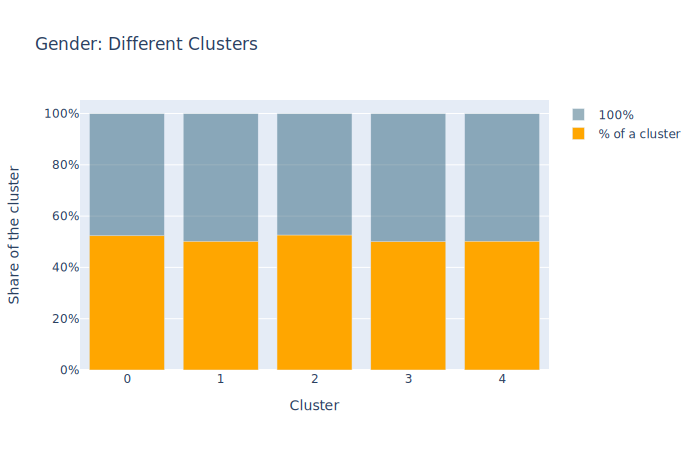

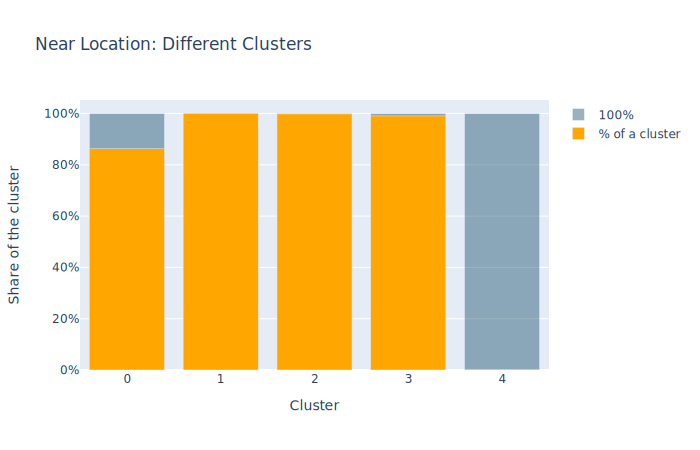

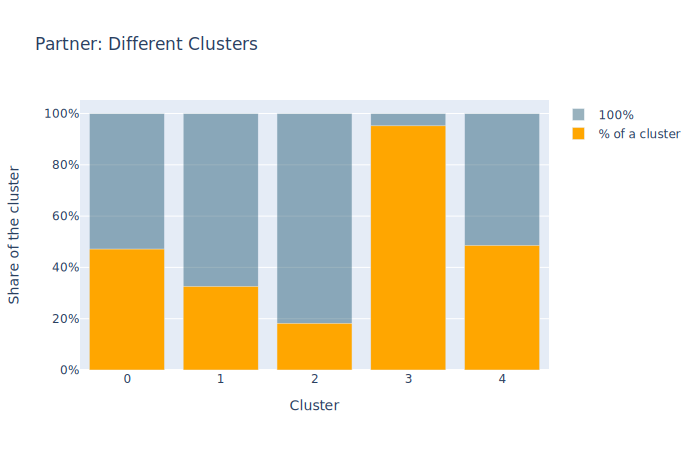

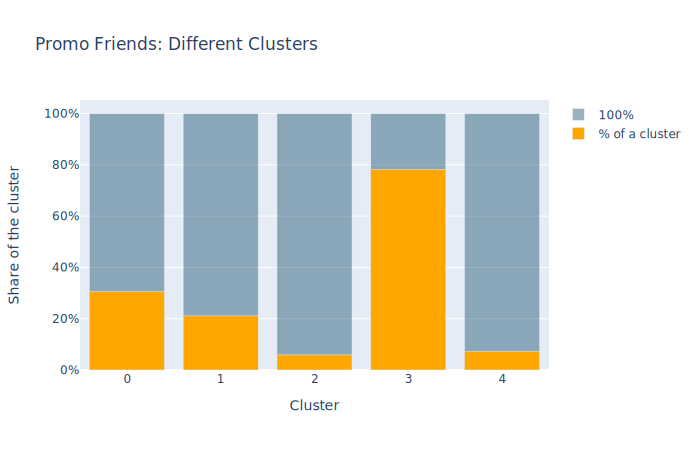

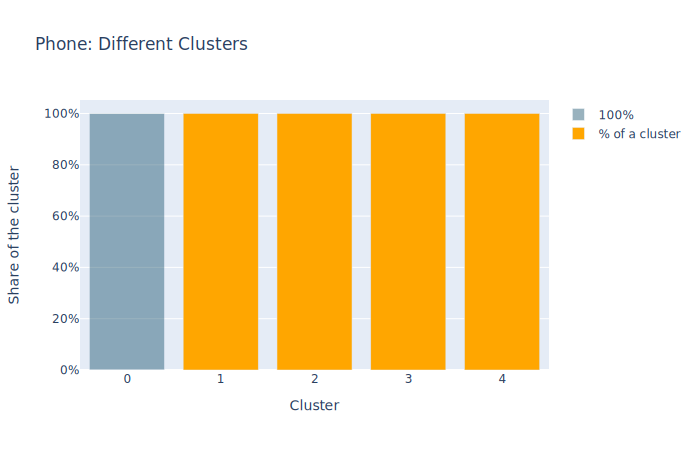

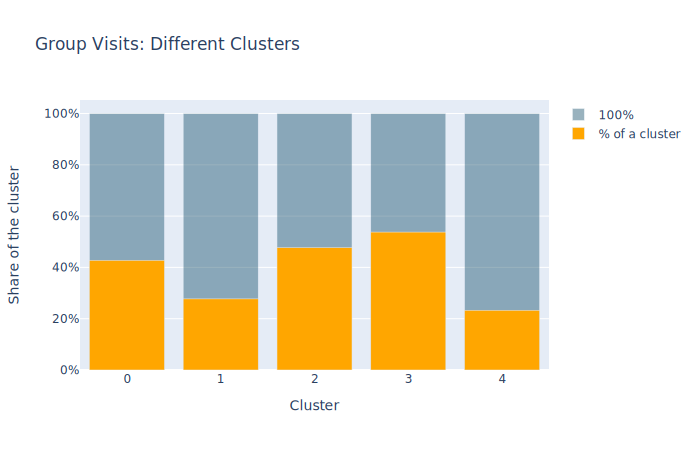

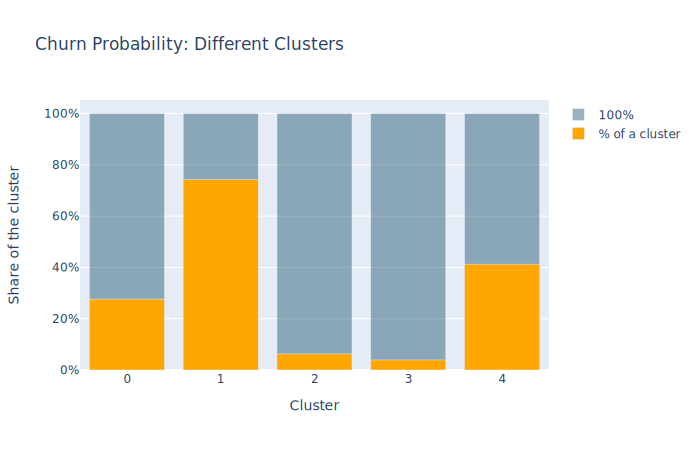

In [40]:
for i in clusters.drop(columns=['contract_period', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total']).columns:
    fig = go.Figure()
    fig.add_trace(go.Bar(x=clusters.index, y=[1, 1, 1, 1, 1], name='100%', marker_color='#003f5c', opacity=0.4))
    fig.add_trace(go.Bar(x=clusters.index, y=clusters[i], name='% of a cluster', marker_color='#ffa600', opacity=1))
    fig.update_layout(title='{}: Different Clusters'.format(i.replace('_', ' ').title()),
                     barmode='overlay',
                     xaxis_title='Cluster',
                      yaxis_title='Share of the cluster',
                     yaxis=dict(tickformat='.0%'))
    fig.show('svg')

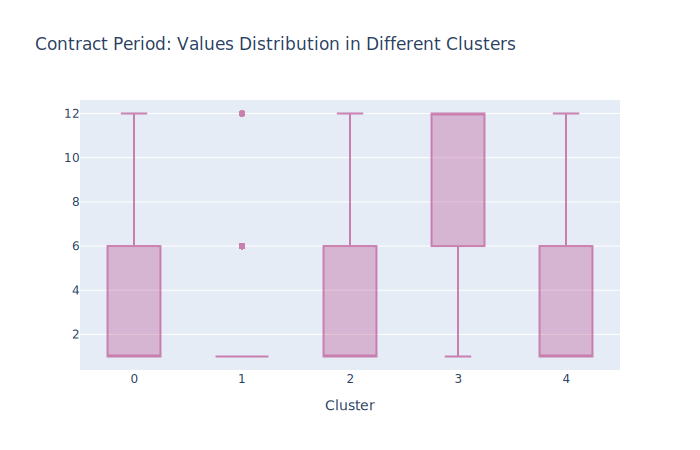

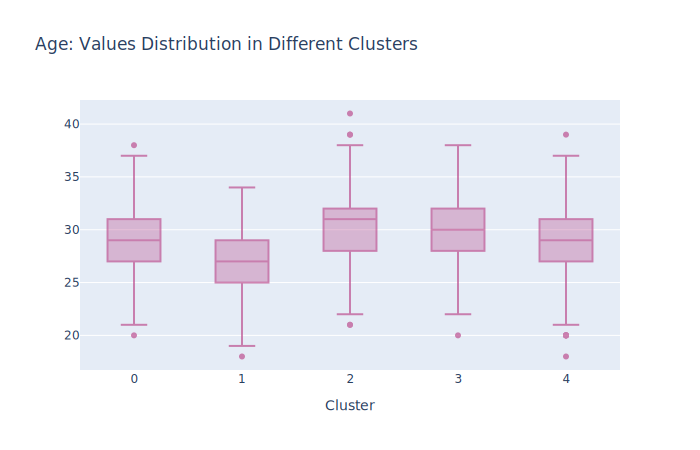

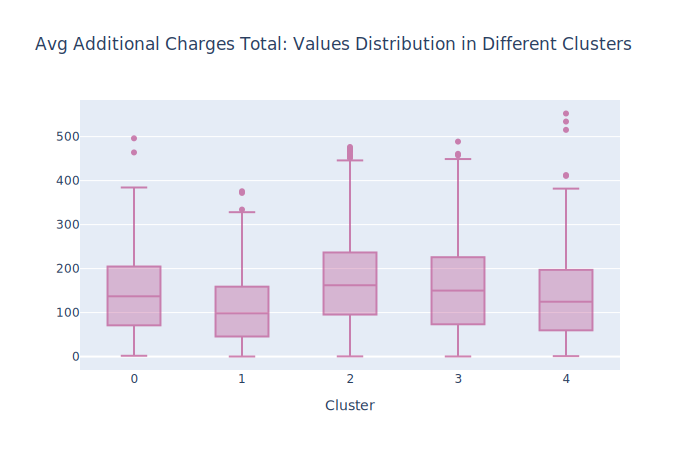

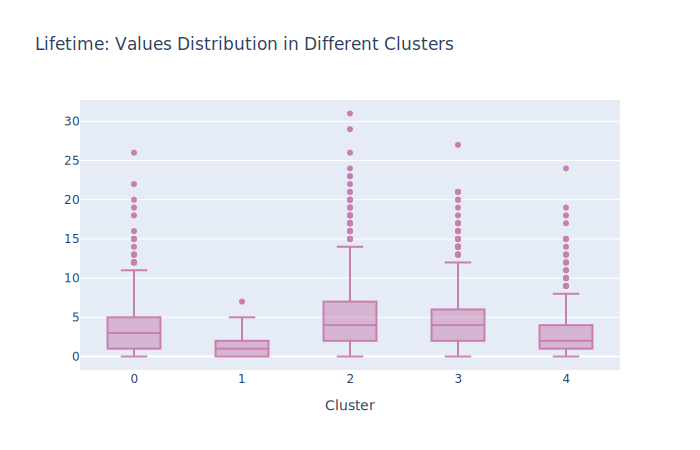

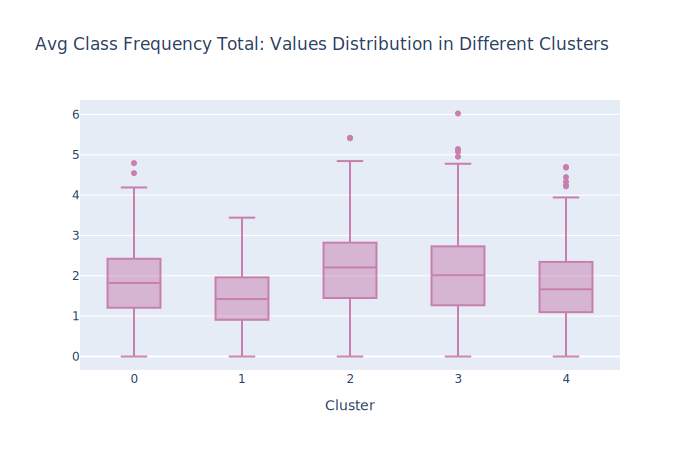

In [41]:
for i in users[['contract_period', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total']].columns:
    fig = go.Figure()
    fig.add_trace(go.Box(x=users['cluster'], y=users[i], marker_color='#bc5090', opacity=0.7))
    fig.update_layout(title_text='{}: Values Distribution in Different Clusters'.format(i.replace('_', ' ').title()),
                     xaxis_title='Cluster')
    fig.show('svg')

After visualising features' distribution we see that the graphs confirm our hypotheses made on mean values.

We've also noticed that cluster 1 stands out from all points of view. They are the youngest clients (though the age difference is not that big), have mostly 1 month long contracts, the smallest lifetime (0-2 months), spend the smallest amount of money and have the lowest frequency of group class visits. They seem to be lost clients from the very beginning.

#### Do clusters differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

We already have calculated average churn probability. Now let's compare it to the known churn rate.

In [42]:
# Returning the churn column

users_churn = users.merge(data_cut['churn'], how='left', left_index=True, right_index=True)
users_churn.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn_probability,cluster,status,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0.19,0,Medium risk,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0.00,2,Low risk,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0.51,1,High risk,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0.00,3,Low risk,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0.37,1,High risk,0


In [43]:
churn_rate = users_churn.groupby('cluster')[['churn_probability', 'churn']].mean().reset_index()
churn_rate.rename(columns={'churn':'actual_churn'}, inplace=True)
churn_rate

,cluster,churn_probability,actual_churn
0,0,0.276295,0.266839
1,1,0.741955,0.747630
2,2,0.062565,0.057192
3,3,0.039134,0.034840
4,4,0.412599,0.404332


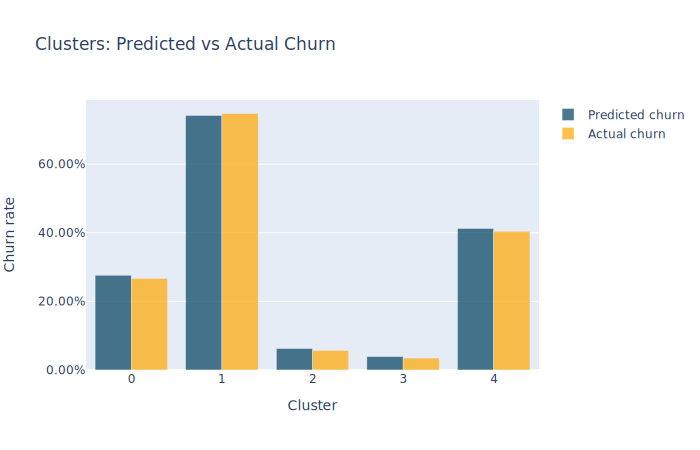

In [44]:
churn_fig = go.Figure()
churn_fig.add_trace(go.Bar(x=churn_rate.cluster, y=churn_rate.churn_probability, name='Predicted churn',
                    marker_color='#003f5c', opacity=0.7))
churn_fig.add_trace(go.Bar(x=churn_rate.cluster, y=churn_rate.actual_churn, name='Actual churn',
                    marker_color='#ffa600', opacity=0.7))
churn_fig.update_layout(barmode='group',
                 title_text='Clusters: Predicted vs Actual Churn',
                 xaxis_title='Cluster',
                 yaxis_title='Churn rate',
                       yaxis=dict(tickformat='.2%'))
churn_fig.show('svg')

We're pleased to see that our predictions reflect the actual data. We can see that clusters 2 and 3 are at minimal risk and their churn rate is the lowest. Clusters 0 and 4 have higher churn rate, but we are not at risk of losing them yet. Unfortunately, clients from cluster 1 can be seen as already lost.

In most cases, predicted churn rate is slightly higher than the actual one (though it's possible that it takes into account people that are about to drop out of the gym the following month).

[Back to Contents](#cont)

### <a id='step4concl'>Conclusions to Step 4</a>

We've split Model Gym users to five different clusters, studied their behavior and predicted the churn rate for each cluster (which reflected the actual churn rate really well). We've learned that two of the clusters seem to have highly loyal clients, two clusters are doing relatively well, but one cluster is really problematic: it consists of users who sign up for one month and leave after their contract is over.

[Back to Contents](#cont)

## <a id='genconcl'>General Conclusions</a>

After studying this dataset, we've come to several conclusions. First of all, we've learned that our clients belong to five different clusters: two clusters consist of loyal customers and have very low churn rate; two clusters can be considered medium risk; one is definitely at risk. Let us remind you the overall picture:

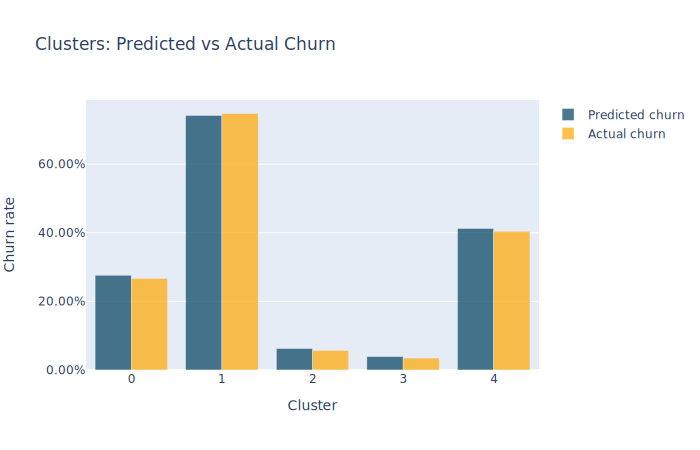

In [45]:
churn_fig.show('svg')

1. In our opinion, **clusters 2 and 3** are completely out of trouble. They have longest contracts and lifetime, often visit group classes and on average spend 70-240 USD on additional services. However, it would be useful to **acknowledge and support their loyalty** to the gym by granting them some free services (e.g. a massage or a personal training session) while their current membership is still valid.

The main difference between them is, **cluster 2 tends to have shorter contracts** (on average 1 or 6 months), while cluster 3 on average signs up for 6 to 12 months. Perhaps, our goal could be to **promote 12 months contracts** among customers from cluster 2 by offering them a personalised discount.

2. The clusters we should really focus on are 0 and 4 (both of them are at medium risk). While clients from **cluster 4** have both short and long term contracts (1 or 6 months), have no troubles spending money (on average 60-200 USD) and are fairly active, all of them **live far from Model Gym**. This is a critical problem which raises their churn rate: one has to have an especially strong motivation in order to visit a gym far from one's home. And while we can't ask them to move closer, what we can do is offer them **significant discounts on long-term contracts** (12 month) as well as **good bonuses for bringing friends**. These two factors (having a long-term contract and working out with a friend) can motivate them to stay with us.

3. As for **cluster 0**, the only thing that truly unites them is their **reluctance to provide their phone number**. As soon as we learn it they would be spread among other clusters according to their real behavior. It's worth trying to sign them up to a free class or some spa service provided they leave their phone number.

4. Finally, let's discuss **cluster 1**. These are the clients who sign up for one month and leave soon after their contract is over, they are not so involved in group classes either. In our opinion, **these clients are not worth the effort of keeping them**. We could offer them a discount on extending their contracts or on signing up for longer period of time (3-6 months), but if that doesn't work, there is no need to invest extra time and money in order to keep them. Perhaps, it's worth **surveying them** and finding our what made them leave. Their criticism could be our material for improvement.

In conclusion, we also want to point out that **partnership program works really well and brings us loyal clients**: 95% of our best cluster (3) are members of this program.

[Back to contents](#cont)